# Analyzing and Visualizing COVID-19 Data in France
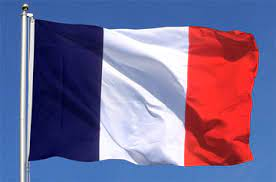

# Background of COVID-19 in France

COVID started in Wuhan, China in December of 2019 when people began to fall sick with a previously unknown pneumonia. China declared it's first case of COVID on Janurary 7th 2020. COVID-19 surveliance in France started on Janurary 10th 2020. The first cases in France were not diagnosed until 14 days later. 
##### Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7029452/#:~:text=Specific%20COVID%2D19%20surveillance%20has,days%20later%2C%20on%2024%20January. 

# Data Source

###### The Data is from European Centre for Disease Prevention and Control 
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [3]:
%matplotlib inline
import pandas


# Overview of Data 

In [4]:
df = pandas.read_excel('s3://schultz-241-2023-python/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865



# France's Covid Data 

In [5]:
france_data = df.loc[ df['countriesAndTerritories']=='France' ]

france_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
20364,2020-12-14,14,12,2020,11533,150,France,FR,FRA,67012883.0,Europe,236.326200
20365,2020-12-13,13,12,2020,13947,194,France,FR,FRA,67012883.0,Europe,233.716254
20366,2020-12-12,12,12,2020,13406,627,France,FR,FRA,67012883.0,Europe,231.556968
20367,2020-12-11,11,12,2020,13750,292,France,FR,FRA,67012883.0,Europe,230.263187
20368,2020-12-10,10,12,2020,14595,296,France,FR,FRA,67012883.0,Europe,229.984136
20369,2020-12-09,9,12,2020,13713,831,France,FR,FRA,67012883.0,Europe,232.501562
20370,2020-12-08,8,12,2020,3411,366,France,FR,FRA,67012883.0,Europe,225.699885
20371,2020-12-07,7,12,2020,11022,174,France,FR,FRA,67012883.0,Europe,227.253318
20372,2020-12-06,6,12,2020,12923,214,France,FR,FRA,67012883.0,Europe,230.439272
20373,2020-12-05,5,12,2020,11221,627,France,FR,FRA,67012883.0,Europe,237.837850



# Deaths in Relation to Number of Cases

<AxesSubplot: xlabel='cases', ylabel='deaths'>

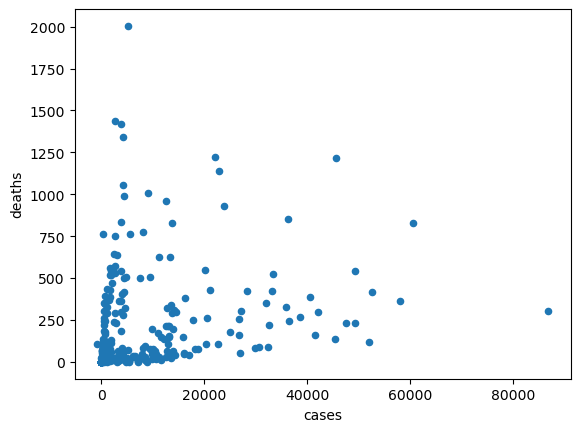

In [6]:
france_data.plot.scatter(x='cases',y='deaths')

## Explanation of Calculations
This model is a linear regression comparing the cases to the number of deaths in france. 

## Explanation of Visualizations
There does not appear to be a strong correlation between the number of cases and number of deaths. Even with a high number of cases, there were still the same amount of deaths as seen with less cases. This shows that France had good mitigation efforts to prevent death when cases were present.


# Month With Highest Number of Deaths

/tmp/ipykernel_7365/1788494786.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_deaths_per_month = france_data.groupby('month').sum()['deaths']


<AxesSubplot: xlabel='month'>

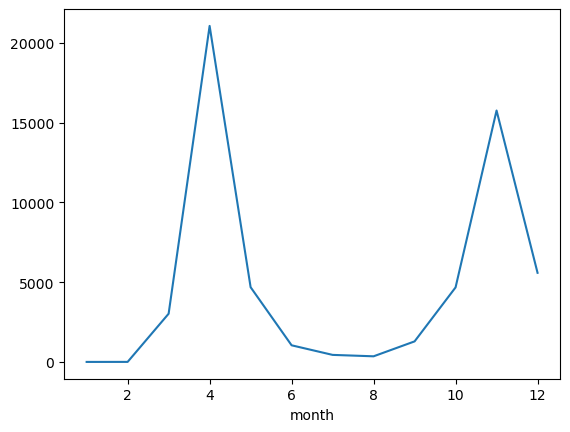

In [7]:
sum_deaths_per_month = france_data.groupby('month').sum()['deaths']
sum_deaths_per_month.plot()

## Explanation of Calculations
This is a line graph illustrating the number of deaths per month. The months are numbered from 1-12 on the x-axis and deaths numbered on the y-axis.

## Explanation of Visualization
The graph shows that there were a maximum number of deaths during April of over 20,000 deaths. We saw an increase in deaths after Feburary and they did not decrease until the peak in April. They hit a low point from June to September and rose again in October. 


# Month With Highest Number of Cases

/tmp/ipykernel_7365/2990800422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_cases_by_month=france_data.groupby('month').sum()['cases']


<AxesSubplot: xlabel='month'>

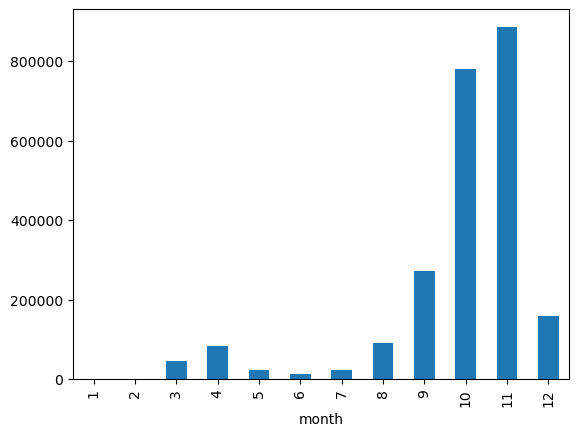

In [10]:
sum_cases_by_month=france_data.groupby('month').sum()['cases']
sum_cases_by_month.plot.bar()

## Explanation of Calculations
This is a bar graph showing the number cases of COVID-19 per month. The numbers on the x-axis relate to the number month in the year it is.

## Explanation of Visualization
This graph illustrates that the number of cases started to increase in March and April, stayed slighly lower in May-July and then picked back up in August. A spike of cases occured in November with over 800,000 cases.

## Conclusion

In conclusion this analysis specifically focuses on France and has allowed us to visualize trends of COVID-19 throughout 2020. We looked at deaths in relation to number of cases and found that there is not a strong correlation. From this we can conclude that France did a good job at minimizing deaths even when cases were high. We also looked at which months had the highest number of deaths and as the graph illustrates, the winter months saw more deaths than the warmer months. We can conclude that this could possibly be related to other diseases like the flu which also occurs during the winter months. Finally, we looked at the cases per month and observed that the cases did not hit their peak until November. We could conclude that they hit their peak in November because of holiday season and getting together with family.

The limitations of our data is that we are unable to break down the numbers in France by economic status, region, or health care opportunities available. There may be outliers in this data due to looking at all of France. 

Suggestions for further research are that age and other socioeconomic fractors should be taken into account. Vaccinations would also be interesting data to look at in comparison to deaths and cases. More recent years would also be great for next steps of looking at COVID-19 over the years. 